## Graphlets
#### CS 575 Tutorial
#### Winter 2026
####
#### Mike Goodrich

Sources

- Doroud, M., Bhattacharyya, P., Wu, S. F., & Felmlee, D. (2011, October). The evolution of ego-centric triads: A microscopic approach toward predicting macroscopic network properties. In 2011 IEEE Third International Conference on Privacy, Security, Risk and Trust and 2011 IEEE Third International Conference on Social Computing (pp. 172-179). IEEE.

- Tu, K., Li, J., Towsley, D., Braines, D., & Turner, L. D. (2019, August). gl2vec: Learning feature representation using graphlets for directed networks. In Proceedings of the 2019 IEEE/ACM international conference on advances in social networks analysis and mining (pp. 216-221).

- Copilot response to _"Could you please give me a summary of what graphlets are in a network science context?"_


- [Stanford Graph Machine Learning lecture 2.1](https://www.youtube.com/watch?v=3IS7UhNMQ3U). (Click to follow link.)

- The definitions of _isomorphism_ and _induced subgraph_ are taken from pages 1 and 2 in _Algebraic Graph Theory_ by C. Godsil and G. Royle (Springer 2001).

---

## Table of Contents

1. [Learning Goals](#0-learning-goals)
2. [Graphlet Definition](#1-graphlet-definition)
   - [Unrooted Graphlet](#11-unrooted-graphlet)
   - [Rooted Graphlet](#12-rooted-graphlet)
   - [Graphlets Overview](#13-graphlets)
3. [Graph Isomorphism](#2-graph-isomorphism)
   - [Examples to Build Intuition](#21-examples-to-build-intuition)
   - [Bijective Mapping](#22-bijective-mapping-from-vertices-to-vertices)
   - [Edge-Preserving Mapping](#23-edge-preserving-bijective-mapping)
   - [Isomorphism Example](#24-example)
   - [Counterexample](#25-counterexample)
   - [networkx Isomorphism Tool](#26-networkx-isomorphism-tool)
   - [Isomorphism as Equivalence Relation](#3-isomorphism-is-an-equivalence-relation)
4. [Graphlets Are Connected](#4-graphlets-are-connected)
   - [Connected Graphlets on Three Vertices](#42-graphlets-with-three-vertices)
   - [Connected Graphlets on Two Vertices](#43-graphlets-with-two-vertices)
   - [Connected Graphlets on Four Vertices](#44-graphlets-with-four-vertices)
5. [Graphlets Are Rooted Graphs](#5-graphlets-are-rooted-graphs)
   - [Hub vs Periphery](#51-why-position-matters-hub-vs-periphery)
   - [Rooted Graph Isomorphism Definition](#52-defining-rooted-graph-isomorphism)
   - [Implementation](#53-implementation)
   - [Three-Node Rooted Graphlets](#54-three-node-rooted-graphlets)
   - [Four-Node Rooted Graphlets](#55-four-node-rooted-graphlets)
6. [Graphlets Are Induced Subgraphs](#6-graphlets-are-induced-subgraphs)
   - [Example Graph](#61-example-graph)
   - [From Triads to Induced Subgraphs](#62-from-triads-to-induced-subgraphs)
   - [Mathematical Definition](#63-mathematical-definition-of-an-induced-subgraph)
   - [Implementation Note](#64-implementation-for-finding-induced-subgraphs)
7. [Using Graphlets](#using-graphlets)
8. [Homework](#homework-problems-1-3)

### 0 Learning Goals

The objective of this tutorial is for you (a) to understand the definition of a graphlet, (b) to understand how a set of graphlets are defined, and (c) to learn how to compute the __graphlet signature__ for a node. Along the way, you'll encounter the following concepts:
- subgraphs and induced subgraphs
- graphlet isomorphism classes
- rooted and unrooted graphlets
- an "orbit" around a node for a rooted graphlet

### 1 Graphlet Definition

The two primary sources used to construct this tutorial have slightly different defintions. The first source defines a set of graphlets as a "small connected non-isomorphic induced subgraphs of a larger network" [Tu et al 2019]. This definition doesn't include one element from the second source (the Stanford lecture): "A graphlet is a **rooted** connected non-isomorphic subgraph" [minute 19:30, emphasis added].  I've found that the union of these two definitions is the most useful. 

#### 1.1 Unrooted Graphlet
An unrooted graphlet is a connected, induced subgraph of a larger graph.

#### 1.2 Rooted Graphlet
A rooted graphlet is a connected, rooted, induced subgraph of a larger graph.

#### 1.3 Graphlets
A set of graphlets are a set of graphs that are 
  - non-isomorphic to each other,
  - connected subgraphs, 
  - rooted subgraphs, and
  - induced subgraphs

We'll begin with the notion of graph isomorphism.

---

### 2 Graph Isomorphism

The name _isomorphism_ means "same form", so two _isomorphic graphs_ have the same form as each other. In other words, two graphs are isomorphic if they are "essentially the same" as some others.  Mathematically, we show that two graphs are isomorphic by showing that one graph can be mapped to the other graph in such a way that essential graph properties stay the same.


#### 2.1 Examples to Build Intuition
Consider the following thought exercise. Observe that there are a finite number of graphs that I can construct from three nodes.  
- A graph with no edges
- A graph with only one edge
- A graph with two edges
- A graph with three edges

Consider the following two graphs:
- $G_1 = (V_1, E_1)$ where
  - $V_1 = \{a,b,c\}$
  - $E_1 = \{\}$
- $G_2 = (V_2, E_2)$ where
  - $V_2 = \{1,2,3\}$
  - $E_2 = \{\}$
Both graph $G_1$ and graph $G_2$ have three nodes and no edges. Even though the two graphs have different node names, the two graphs have the same number of edges. The key observation is that both graphs have essentially the same structure because they have the same number of nodes and the connections between the nodes is the same.

Consider a slight change to the example and construct two graphs with three vertices and one edge:
- $G_3 = (V_3, E_3)$ where
  - $V_3 = \{a,b,c\}$
  - $E_3 = \{(a,b)\}$
- $G_4 = (V_4, E_4)$ where
  - $V_4 = \{1,2,3\}$
  - $E_4 = \{(2,3)\}$
As before, the key observation is that both graphs have essentially the same structure because they have the same number of nodes and the connections between nodes is the same.

Observe that graph $G_1$ and graph $G_3$ have different structures: one has no edges and the other has oneone edge. These two graphs are not "essentially the same".

With these examples in mind, we can discuss Godsil and Royle's formal definition of a graph isomorphism. We'll split the discussion into two parts, a part that talks about the vertices and a part that talks about the edge structure.


#### 2.2 Bijective Mapping from Vertices to Vertices

Suppose we have two graphs, $G_1$ and $G_2$ with vertex sets $V(G_1)$ and $V(G_2)$, respectively. We could check to see if the two graphs can be isomorphic by counting the number of vertices and, if they match, conclude that it is possible for the two graphs to be isomorphic. The problem with that is that just counting vertices doesn't work well when we try to check edge structure.  

Instead, we'll replace "counting nodes" by talking about a mapping $\phi$ between the two vertex sets

$$ \phi : V(G_1) \rightarrow V(G_2) $$

If the mapping $\phi$ is a _bijection_ (i.e., it is both a _one-to-one and onto_ mapping) then we know that the number of vertices in the $V(G_1)$ and $V(G_2)$ must be the same.

**Example.** Suppose $V(G_1) = \{1,2,3\}$ and $V(G_2) = \{a,b,c\}$. The following table represents a bijection:

| $v \in V(G_1)$ | $\phi(v) \in V(G_2)$ |
| :---: | :---: |
| 1 | b |
| 2 | c | 
| 3 | a |

Notice how each vertex from graph $G_1$ is mapped to a unique vertex in graph $G_2$, and notice how each graph has the same number of vertices. Thus, $\phi$ is a bijection from $V(G_1)$ to $V(G_2)$.

By contrast, the mapping in the following table is not a bijection:

 $v \in V(G_1)$ | $\phi(v) \in V(G_2)$ |
| :---: | :---: |
| 1 | b |
| 2 | c | 
| 3 | b |

because both vertex 1 and vertex 2 are mapped to vertex b, and no vertices are mapped to vertex a.

#### 2.3 Edge-Preserving Bijective Mapping

The existence of a bijective mapping between vertices satisfies the first element of isomorphism: two graphs can only be isomorphic if they have the same number of vertices. Godsil and Royle's definition of isomorphic graphs adds a condition about edges. Two graphs $G_1$ and $G_2$ are isomorphic if the following two conditions hold:

- There exists a bijection $\phi: V(G_1) \rightarrow V(G_2)$
- If two vertices $v_1$ and $v_2$ are connected in graph $G_1$ then the corresponding vertices in $G_2$ are also connected.

This latter condition, which is sometimes called the "edge preserving mapping" condition, is formally given as

$$ \big(v_1,v_2\big) \in E(G_1) \leftrightarrow \big( \phi(v_1),\phi(v_2)\big ) \in E(G_2) $$

In essence, if two nodes are connected before the mapping then they are connected after the mapping. 

_Two graphs are isomorphic if there exists an edge-preserving bijective mapping._


#### 2.4 Example 

Are the two graphs below isomorphic? The answer is yes, and we will show that by constructing an edge-preserving bijective mapping.

- $G_1 = (V_1,E_1)$
  - $V_1 = \{1,2,3\}$ 
  - $E_1 = \{(1,2),(2,3)\}$

- $G_2 = (V_2,E_2)$
  - $V_2 = \{a,b,c\}$ 
  - $E_2 = \{(b,c),(c,a)\}$

It's tempting to say that the two graphs are isomorphic since they have each have three vertices and two edges, but we'll see that the direction of the edges matters.

Let's draw the two graphs side-by-side to build some intuition.

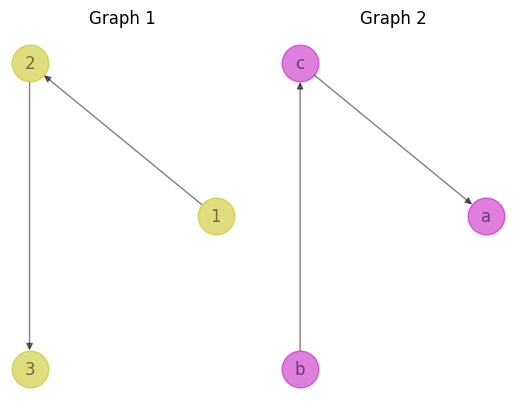

In [1]:
# Using python 3.11.2
# Isomorphism
from matplotlib import pyplot as plt
import networkx as nx

## Define graph G1
nodes_G1 = {1,2,3}
edges_G1 = {(1,2),(2,3)}
G1 = nx.DiGraph()
G1.add_nodes_from(nodes_G1)
G1.add_edges_from(edges_G1)

## Define graph G2
nodes_G2 = {'a','b','c'}
edges_G2 = {('b','c'),('c','a')}
G2 = nx.DiGraph()
G2.add_nodes_from(nodes_G2)
G2.add_edges_from(edges_G2)

## Plot graph G1
pos1 = nx.circular_layout(G1)
plt.figure(1)
plt.subplot(121)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'y', alpha = 0.5, node_size = 700, with_labels = True)

## Plot graph G2
pos2 = nx.circular_layout(G2)
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 2")
nx.draw(G2,pos2,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)

These two graphs are isomorphic because the following mapping is an edge-reserving bijective mapping

| $v \in V(G_1)$ | $\phi(v) \in V(G_2)$ |
| :---: | :---: |
| 1 | b |
| 2 | c | 
| 3 | a |

but it's hard to see that in the figure. Let's redraw the second figure.

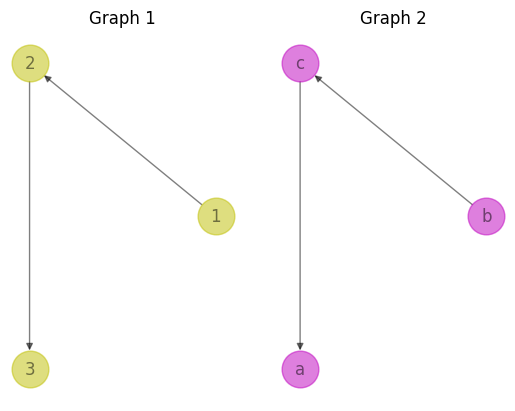

In [2]:
## Plot graph G1
pos1 = nx.circular_layout(G1)
plt.figure(1)
plt.subplot(121)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'y', alpha = 0.5, node_size = 700, with_labels = True)

## Plot graph G2
pos2 = nx.circular_layout(G2)
pos2['a'] = pos1[3]
pos2['c'] = pos1[2]
pos2['b'] = pos1[1]
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 2")
nx.draw(G2,pos2,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)

The picture makes it obvious that each graph has essentially the same structure: a chain of three vertices connected in order by directed edges.

Observe the following about what happens to the nodes when they are mapped:
  - node 1 on the left gets mapped to node b on the right
  - node 2 on the left gets mapped to node c on the right
  - node 3 on the left gets mapped to node a on the right

Above, we said that isomorphism requires that if there is an edge between two nodes before the mapping then there still needs to be an edge between the mapped nodes after the mapping. Recall that the definition of edge-preserving is
$$ \big(v_1,v_2\big) \in E(G_1) \leftrightarrow \big( \phi(v_1),\phi(v_2)\big ) \in E(G_2) $$
Observe the following about the edges of the two graphs:
  - there is a directed edge (1,2) on the left and a directed edge (b,c) on the right, so the mapping 1-->a and 2-->c preserves connectedness
  - there is a directed edge (2,3) on the left and a directed edge (c,a) on the right, so the mapping 2-->c and 3-->a preserves connectedness

The mapping changed the names of the vertices, but vertices connected before the mapping are still connected after the mapping. Since there is a _edge-preserving bijection_ between the two graphs, the two graphs are isomorphic.



#### 2.5 Counterexample

The following two graphs are not isomorphic.

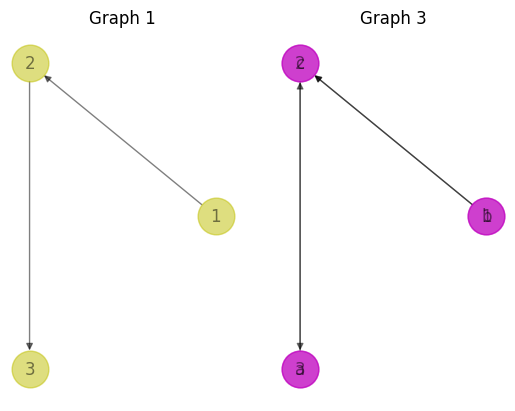

In [3]:
# Using python 3.11.2
# Not isomorphic
from matplotlib import pyplot as plt
import networkx as nx

## Define graph G1
nodes_G1 = {1,2,3}
edges_G1 = {(1,2),(2,3)}
G1 = nx.DiGraph()
G1.add_nodes_from(nodes_G1)
G1.add_edges_from(edges_G1)

## Define graph G3
nodes_G3 = {'a','b','c'}
edges_G3 = {('b','c'),('a','c')}
G3 = nx.DiGraph()
G3.add_nodes_from(nodes_G3)
G3.add_edges_from(edges_G3)

## Plot graph G1
pos1 = nx.circular_layout(G1)
plt.figure(1)
plt.subplot(121)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'y', alpha = 0.5, node_size = 700, with_labels = True)

## Plot graph G3
pos3 = nx.circular_layout(G3)
pos3['a'] = pos1[3]
pos3['c'] = pos1[2]
pos3['b'] = pos1[1]
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 3")
nx.draw(G3,pos3,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)

The two graphs are not isomorphic because the edge structure is not the same. The first graph is a chain of vertices with the edges pointing from the first element of the chain to the second to the third. The second graph isn't a chain but rather a graph where two vertices point to a third vertex. 

#### 2.6 `networkx` Isomorphism Tool

Determining whether two graphs are isomorphic is in class NP. (You can ignore this part of the discussion if you aren't familiar with complexity classes a la CS 252.) It is not known whether there is a polynomial-time solution in general, but there are polynomial-time algorithms that work for certain graph types.

`networkx` provides a tool for checking whether two graphs are isomorphic. I've never looked into the algoirthm to determine how it works, but we can form a simplified mental model for how it might work by assuming that it searches through all possible bijective mappings and checks whether any of them are edge-preserving. 

The following code cells demonstrate how to use the tool.


In [4]:
import networkx.algorithms.isomorphism as iso

def is_isomorphic(G1, G2):
    """
    Check if two directed graphs are isomorphic and print the mapping if found.
    
    This function determines whether two directed graphs have the same structure
    by attempting to find an edge-preserving bijection between their vertex sets.
    If an isomorphism exists, it prints the mapping between vertices.
    
    Parameters
    ----------
    G1 : networkx.DiGraph
        The first directed graph to compare.
    G2 : networkx.DiGraph
        The second directed graph to compare.
    
    Returns
    -------
    bool
        True if the graphs are isomorphic, False otherwise.
    
    Notes
    -----
    This function uses NetworkX's DiGraphMatcher to find isomorphisms. When an
    isomorphism is found, the vertex mapping is printed to show how vertices in
    G1 correspond to vertices in G2.
    
    Examples
    --------
    >>> G1 = nx.DiGraph([(1,2), (2,3)])
    >>> G2 = nx.DiGraph([('a','b'), ('b','c')])
    >>> is_isomorphic(G1, G2)
    mapping found: {1: 'a', 2: 'b', 3: 'c'}
    True
    """
    GM = iso.DiGraphMatcher(G1, G2)
    if GM.is_isomorphic():
        print(f"mapping found: {GM.mapping}")
        return True
    return False

print("Are G1 and G2 isomorphic?", is_isomorphic(G1, G2))
print("Are G1 and G3 isomorphic?", is_isomorphic(G1, G3))


mapping found: {3: 'a', 2: 'c', 1: 'b'}
Are G1 and G2 isomorphic? True
Are G1 and G3 isomorphic? False


---
---

#### 3 Isomorphism is an Equivalence Relation

Defining a a graphlet depends on an important property of graph isomorphisms: _isomorphism is an equivalence relation_. If needed, use an AI assistant to help you review the following terms related to the mathematical notion of an equivalence relation:
- binary relation
- equivalence relation
- equivalence class

Since graph isomorphism is an equivalence relation, we can sometimes treat two isomorphic graphs as if they are identical. In this context, an _equivalence class_ is the set of all graphs that are isomorphic to each other.


#### 3.1 Representing Isomorphic Graphs

It is useful to illustrate how we can visualize all graphs in an isomorphism equivalence class. We'll do this by constructing two isomorphic graphs and then removing the vertex label. 

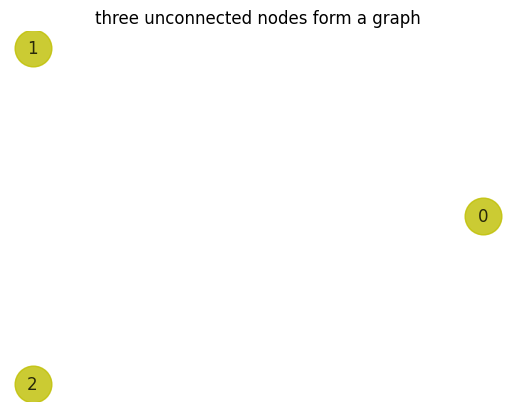

In [5]:
# Isomorphism
from matplotlib import pyplot as plt
import networkx as nx

nodes: set[int] = {0,1,2}
G = nx.DiGraph()
G.add_nodes_from(nodes)
pos = nx.circular_layout(G)
ax = plt.gca()
ax.set_title("three unconnected nodes form a graph")
nx.draw(G,pos,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = True)

We can form a graph that is isomorphic to the first.

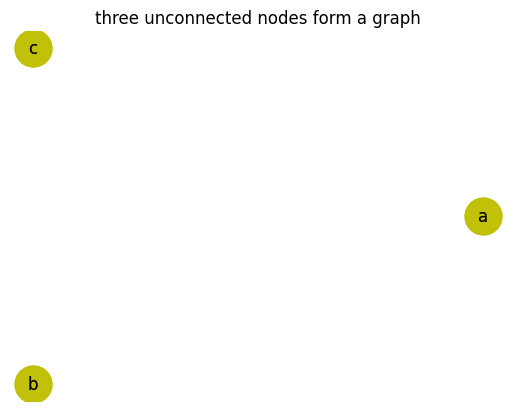

In [6]:
nodes2: set[int] = {'a','b','c'}
G2 = nx.DiGraph()
G2.add_nodes_from(nodes2)
pos2 = nx.circular_layout(G2)
ax = plt.gca()
ax.set_title("three unconnected nodes form a graph")
nx.draw(G2,pos2,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = True)
colormap = dict([(node,'y') for node in list(G2.nodes)])
ax = plt.gca()
ax.set_title("three unconnected nodes form a graph")
nx.draw(G2,pos2,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = True)

These two graphs are isomorphic since all that changed was the names of the nodes. We can represent the equivalence class of all nodes that are isomorphic to these two graphs by simply dropping the node labels.

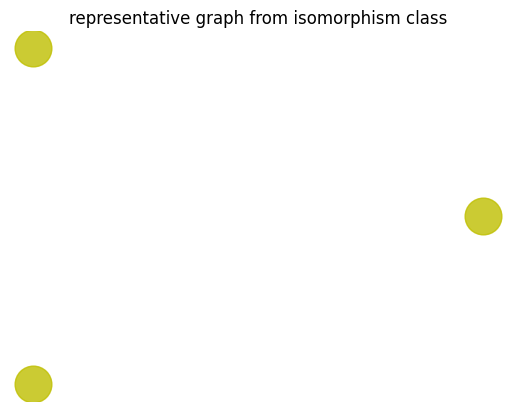

In [7]:
colormap = dict([(node,'y') for node in list(G.nodes)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw(G,pos,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = False)

#### 3.2 Representing Nontrivial Isomorphic Graphs 
Let's add a single directed edge and draw a graph from this isomorphism class 

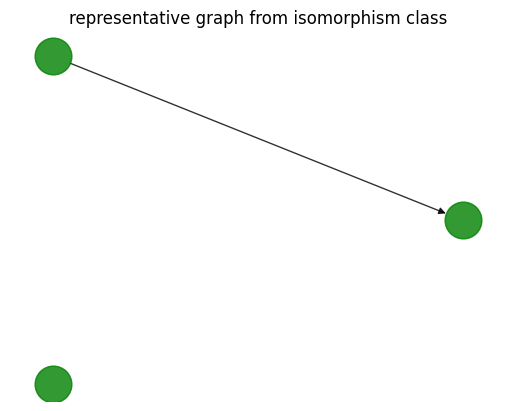

In [8]:
G.add_edge(1,0)
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw(G,pos,node_color = 'g', alpha = 0.8, node_size = 700, with_labels = False)

The graph above represents one of the (isomorphism) equivalence classes for a directed graph with three vertices. Let's add another edge.

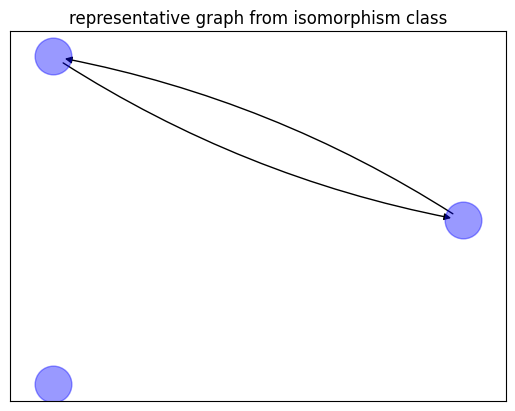

In [9]:
# Add an edge in the opposite direction
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1),(1,0)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw_networkx_nodes(G,pos,node_color = 'b', alpha = 0.4, node_size = 700)
_ = nx.draw_networkx_edges(G,
                       pos,
                       connectionstyle="arc3,rad=0.1"
)

We now have a representative graph from a new equivalence class.


#### 3.3 Set of Equivalence Classes

The following figure is from Doroud et al. 2011.

<img src = "figures/isomorphism_classes_3_node_directed_graph.png" alt="set of all isomorphism classes from Figure 3.1 of Doroud et al. 2011"/>

It illustrates a set of graphlets, which for our purposes is just the set of isomorphism equivalence classes for a directed graph with three vertices. Take a moment to convince yourself that none of these graphs is isomorphic to any of the other graphs. Ignore the numbering beneath each graph in the figure; the numbering is a special way of identifying the equivalence classes, but we won't use those identifiers.

If we want to, we can construct each of these graphs. Let's just create a few of them.

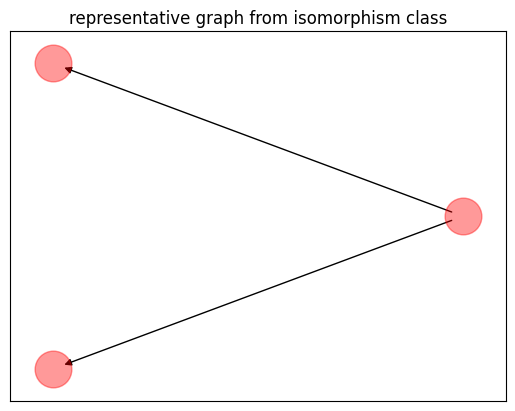

In [10]:
# Create the next equivalence class
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1),(0,2)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw_networkx_nodes(G,pos,node_color = 'r', alpha = 0.4, node_size = 700)
_ = nx.draw_networkx_edges(G,
                       pos,
                       connectionstyle="arc3,rad=0.0")

Add one more

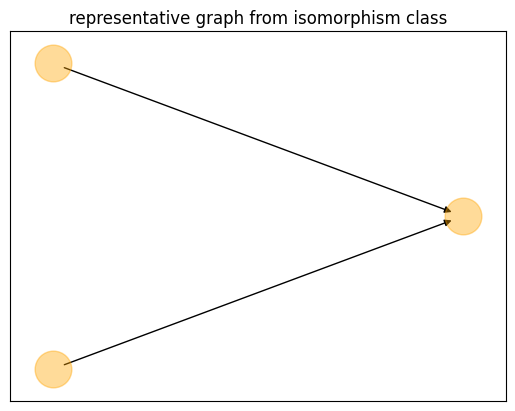

In [11]:
# And one more
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(1,0),(2,0)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
_ = nx.draw_networkx_nodes(G,pos,node_color = 'orange', alpha = 0.4, node_size = 700)
_ = nx.draw_networkx_edges(G, 
                       pos,
                       connectionstyle="arc3,rad=0.0")

Notice how the arrows in this figure point in the opposite direction than the arrows in the previous graph. The two graphs are not isomorphic because swapping two the names of two vertices doesn't preserve the direction of the edges.

---

#### 4 Graphlets are Connected

Doroud et al.'s 2011 paper introduced the idea of graphlets, which was essentially the set of isomorphism equivalence classes. Since that paper, others have refined Douroud et al.'s definition to make it more useful. This tutorial had listed the four elements required to make up a graphlet:

**Elements of a group of graphlets:**
  - non-isomorphic graphs
  - connected graphs
  - rooted graphs
  - induced subgraphs

  Some of the graphs above are not connected. Let's add that to our definition and see what we produce. For the next part of the tutorial, we'll use undirected graphs.


#### 4.1 Restricting the Isomorphism Classes to Connected Graphs
  The following code generates every possible _connected_ graph that can be created from three vertices. Using the copilot prompt "how do i find the set of all isomorphic graphs with a four nodes in networkx", we get the following code. 

I've modified the code from copilot in four ways: 
- Added type hints
- Changed the index names so they can be either strings or ints
- Restricted attention to connected graphs
- Made it so that it produced the graphlets composed of nodes passed to the function in the `nodes` list

Notice the lines

```python
        if nx.is_connected(G):
            all_graphs.append(G)
```

They say that only connected graphs can be graphlets.

In [12]:
import networkx as nx
from itertools import combinations
from typing import  Union

def find_all_unrooted_graphlets(nodes: list[Union[str,int]]) -> list[nx.Graph]:
    """
    Find all non-isomorphic connected graphs on a given set of nodes.
    
    This function generates all possible graphs that can be constructed from a given
    set of nodes, filters for connected graphs, and then removes all but one
    representative from each isomorphism class. The result is a set of unrooted
    graphlets - graphs that are pairwise non-isomorphic and connected.
    
    Parameters
    ----------
    nodes : list[Union[str, int]]
        A list of node identifiers. Can be strings, integers, or a mix.
    
    Returns
    -------
    list[nx.Graph]
        A list of networkx Graph objects, where each graph represents one
        isomorphism equivalence class. All graphs are connected and pairwise
        non-isomorphic to each other.
    
    Notes
    -----
    - The function generates all possible subsets of edges, which is exponential
      in the number of edges (2^n_edges possibilities).
    - Only connected graphs are retained.
    - Isomorphism checking is performed to keep only one representative per class.
    
    Examples
    --------
    >>> graphlets = find_all_unrooted_graphlets(['A', 'B', 'C'])
    >>> len(graphlets)  # Should be 4 connected graphs on 3 nodes
    4
    """
    all_graphs = []
    # Generate all possible edges
    possible_edges = list(combinations(nodes, 2))

    # Generate all possible graphs
    for i in range(2**len(possible_edges)):
        edges = [possible_edges[j] for j in range(len(possible_edges)) if (i >> j) & 1]
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        if nx.is_connected(G):
            all_graphs.append(G)

    ## Only keep one subgraph from each isomorphism class ##
    unique_graphs = []

    for G in all_graphs:
        if not any(nx.is_isomorphic(G, H) for H in unique_graphs):
            unique_graphs.append(G)
    return unique_graphs

I've constructed a helper function that allows us to visualize all the graphs in a particular set. The function, `show_graphs_in_a_set`, takes a list of graphs and displays them in a grid layout. It arranges the graphs in rows and columns (with a default of 4 columns), and each graph is drawn in a circular layout with a different color. You can optionally provide node labels, which will be displayed on the nodes. To use this function, simply call `show_graphs_in_a_set(graphs, labels, num_cols)` where `graphs` is a list of networkx Graph objects, `labels` is an optional dictionary mapping nodes to their display labels, and `num_cols` is the desired number of columns.

#### 4.2 Graphlets with Three Vertices

Collect and display all the (connected) graphlets for a graph with three vertices

In [ ]:
from graphlet_utilities import show_graphs_in_a_set
graphlets = find_all_unrooted_graphlets(['A', 'B', 'C'])
show_graphs_in_a_set(graphlets, num_cols=4)

ImportError: attempted relative import with no known parent package

#### 4.3 Graphlets with Two Vertices

To help build intuition, we can do the same exercise for graphs with two vertices ...

In [ ]:
graphlets = find_all_unrooted_graphlets(['A', 'B'])
show_graphs_in_a_set(graphlets, num_cols=4)

#### 4.4 Graphlets with Four Vertices

The set of isomorphism equivalence classes for graphs with four vertices starts to get really interesting.

In [ ]:
graphlets = find_all_unrooted_graphlets(['A', 'B', 'C', 'D'])
show_graphs_in_a_set(graphlets, num_cols=3)

Notice how none of the graphs above look like the others. Our "pattern-matching brains" naturally differentiate between the different isomorphism classes when graphs are simple to draw.

---

#### 5 Graphlets are Rooted Graphs

(Cell written with input from copilot to help me transition to why we want rooted graphs.)

Up to this point, we've focused on understanding what graphlets are as a collection of non-isomorphic connected graphs. But here's the key question: how do we use graphlets? The answer is that we use graphlets to characterize the **local structure surrounding a specific vertex** in a network.

The idea is simple: if we pick a vertex in a graph and look at all the small subgraphs (of a fixed size) containing that vertex, we can count how many of those subgraphs belong to each graphlet type. This count vector, which is called the _graphlet signature_, tells us about the local neighborhood and features of that specific vertex.

But here's where it gets interesting. Consider two different vertices in a graph that both appear in identical subgraph structures. Should we count them as experiencing the same local structure if one of them is the central "hub" and the other is on the "periphery"? Most of the time, the answer is no since the _position of our vertex of interest matters_. 

This is why we need **rooted graphlets**: by designating one vertex as the root and only counting isomorphisms that keep the root fixed, we can distinguish between a vertex that is central and connected to many neighbors versus one that is peripheral. The rooted graphlet signature captures not just what neighbors are present, but where our specific vertex sits within the local structure.

To build intuition for rooted graphs, let's look at all possible subgraphs of a particular graph containing a specific vertex. Looking at all the possible three node subgraphs of a particular graph will help us understand what it means for two _rooted graphs_ to be isomorphic. Let's create a simple graph that we can use to guide the discussion.

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from({'A','B','C','D','E','F','G'})
G.add_edges_from({('A','B'),('A','C'),('A','D'),('A','E'),('D','C'), ('B','G'), ('F','E')})
pos = nx.fruchterman_reingold_layout(G, seed=42)
nx.draw(G,pos,node_color='y', alpha = 0.8, node_size = 700, with_labels = True)
_ = plt.xlim(-1.2,1.2)
_ = plt.ylim(-1.2,1.2)

I've written a utility that finds all the connected subgraphs of a particular graph that contain a specific vertex. Before running the next cell, look at the graph ans try to answer the following question: What is the set of all connected three node subgraphs that contain vertex A?

In [ ]:
from graphlet_utilities import find_subgraphs_containing_vertex
graphs = find_subgraphs_containing_vertex(G, 3, 'A')
labels: dict[str, str] = {vertex: vertex for vertex in G.nodes()}
show_graphs_in_a_set(graphs, labels)

#### 5.1 Why Position Matters: Hub vs Periphery

Now let's look at concrete examples of why rooted graphlets are necessary. Consider the three-node subgraphs we found above. Look at the two-edge subgraphs:

- There are **five two-edge subgraphs where vertex `A` is between the other two nodes** (hub position): `A` connects two other nodes that are not connected to each other.
- There are **two two-edge subgraphs where vertex `A` is on the end** (peripheral position): `A` connects to one node that is connected to another node.

These represent fundamentally different local structures from `A`'s perspective. In the hub configuration, `A` is a connector. In the peripheral configuration, `A` is simply part of a chain.

If we only used unrooted graphlets, these two very different positions would be grouped together as the "same" two-edge structure. But **they're not the same from the perspective of the vertex `A`!** This is why we need rooted graphlets—to distinguish between being a hub in your local neighborhood versus being on the periphery.


#### 5.2 Defining Rooted Graph Isomorphism

Let's look at how we can implement this mathematically. Recall from Section 2 that two graphs $G_1$ and $G_2$ are isomorphic if there exists an edge-preserving bijection:

$$ \phi: V(G_1) \rightarrow V(G_2) $$

such that 

$$ (v_1, v_2) \in E(G_1) \leftrightarrow (\phi(v_1), \phi(v_2)) \in E(G_2) $$

For **rooted graph isomorphism**, we need an additional constraint: the mapping must keep the root vertex in the same position. If both graphs are rooted at vertex $r$, then the mapping must satisfy:

$$ \phi(r) = r $$

**Key Insight:** Two rooted graphs are isomorphic if and only if:
1. The graphs are isomorphic as unrooted graphs, AND
2. There exists at least one isomorphism mapping that fixes the root vertex

This means we need to find an edge-preserving bijection where the root vertex maps to itself. In practice:
- First, check if the two graphs are isomorphic (using standard graph isomorphism)
- If they are, enumerate all possible isomorphism mappings
- Check if any of these mappings satisfy $\phi(r) = r$
- If such a mapping exists, the rooted graphs are isomorphic; otherwise they are not


#### 5.3 Implementation
Let's implement this approach in code.

In [ ]:
""" Portions of this code were obtained using prompts from 
    copilot. I made a mistake and didn't record the series
    of prompts so I can't document them properly. All I can 
    say is that the prompts were about finding isomorphic
    rooted graphs, making sure that it reflects the definition"""

def rooted_is_isomorphic(G1, G2, root):
    """
    Check if two graphs are isomorphic with a fixed root vertex.
    
    This function determines whether two graphs are rooted isomorphic, meaning
    there exists an edge-preserving bijection φ: V(G1) → V(G2) such that
    φ(root) = root. In other words, the graphs must be isomorphic AND there
    must be at least one isomorphism mapping that keeps the root vertex fixed.
    
    Parameters
    ----------
    G1 : networkx.Graph
        The first graph to compare.
    G2 : networkx.Graph
        The second graph to compare.
    root : str or int
        The root vertex that must be fixed in the isomorphism mapping.
        This vertex must exist in both G1 and G2.
    
    Returns
    -------
    bool
        True if the graphs are rooted isomorphic (i.e., isomorphic with a
        root-fixing mapping), False otherwise.
    
    Notes
    -----
    The algorithm follows these steps:
    1. Check if G1 and G2 are isomorphic as unrooted graphs
    2. If they are, enumerate all possible isomorphism mappings
    3. Check if any mapping satisfies φ(root) = root
    4. Return True if such a mapping exists, False otherwise
    
    Examples
    --------
    >>> # Two path graphs: A-B-C and A-C-B
    >>> G1 = nx.Graph([('A','B'), ('B','C')])
    >>> G2 = nx.Graph([('A','C'), ('C','B')])
    >>> rooted_is_isomorphic(G1, G2, 'A')
    False  # A is at different positions in the two graphs
    """
    # Step 1: Create a GraphMatcher to check for isomorphism
    # This checks if there exists any edge-preserving bijection φ: V(G1) → V(G2)
    GM = iso.GraphMatcher(G1, G2)
    
    # Step 2: Check if the graphs are isomorphic (unrooted)
    if GM.is_isomorphic():
        # Step 3: Enumerate all possible isomorphism mappings φ
        for mapping in GM.isomorphisms_iter():
            # Step 4: Check if this mapping satisfies φ(root) = root
            if mapping[root] == root:
                # Found a root-fixing isomorphism!
                return True
    
    # No root-fixing isomorphism exists
    return False


We can now find the equivalence classes of rooted isomorphic graphs

In [ ]:

def find_all_graphlets(nodes: list[str],
                       root) -> list[nx.Graph]:
    all_graphs = []
    # Generate all possible edges
    possible_edges = list(combinations(nodes, 2))

    # Generate all possible graphs
    for i in range(2**len(possible_edges)):
        edges = [possible_edges[j] for j in range(len(possible_edges)) if (i >> j) & 1]
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        if nx.is_connected(G):
            all_graphs.append(G)

    ## Only keep one subgraph from each isomorphism class ##
    unique_graphs = []
    for G in all_graphs:
        if not any(rooted_is_isomorphic(G, H, root) for H in unique_graphs):
            unique_graphs.append(G)
    return unique_graphs


The key difference between this version of finding all graphlets and the previous versio is in linke 37. In this version of the code, the key function is 

```python
    if not any(rooted_is_isomorphic(G, H, root))
``` 

In the other version, the corresponding line of code was

```python
    if not any(nx.is_isomorphic(G, H))
```

The old version didn't care about the location of the _root_ vertex, but the new version does care.


#### 5.4 Three Node Rooted Graphlets

Let's look at the pictures of the three-node rooted graphlets returned from this function.

In [ ]:
graphlets = find_all_graphlets(['A', 'B', 'C'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(graphlets, labels)

Observe how the set of graphlets now contains three graphs: one that is fully connected, one with vertex `A` on between the other two vertices, and one with vertex `A` as an end point.

#### 5.4 Four Node Rooted Graphlets

Let's look at the pictures of the four-node unrooted graphlets and compare to all four-node rooted graphlets.

In [ ]:
### Unrooted 
four_node_graphlets = find_all_unrooted_graphlets(['A', 'B', 'C', 'D'])
show_graphs_in_a_set(four_node_graphlets, num_cols=4)

And now rooted

In [ ]:
four_node_graphlets = find_all_graphlets(['A', 'B', 'C', 'D'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(four_node_graphlets, labels)

#### 5.5 Conclusion on Rooted Subgraphs

Notice the dramatic difference: the unrooted four-node graphlets show **6 distinct equivalence classes**, but rooted graphlets reveal **15 distinct equivalence classes**. This explosion in the number of graphlets is not a bug—it's a feature.

By keeping track of which vertex is the root, rooted graphlets capture information about **position and role** within the local network structure. A vertex in a central hub position experiences a fundamentally different local neighborhood than a vertex on the periphery, and rooted graphlets distinguish between these roles. This is precisely what we need to compute meaningful graphlet signatures: a count vector that characterizes not just what neighbors are present, but where our specific vertex sits within the local structure.

This is why researchers use rooted graphlets for network analysis: they provide a more nuanced vocabulary for describing **local structure**, that is, how a vertex is embedded in its local neighborhood. Better understanding of local structure enables better differentiation between different types of vertices and their roles in the network.

---
---

#### 6 Graphlets are Induced Subgraphs

We've figured out three of the four requirements of a graphlet.

Elements of a group of graphlets:
  - non-isomorphic graphs
  - connected graphs
  - rooted graphs
  - **induced subgraphs**

Before we dive into the mathematical definition of _induced subgraphs_, let's connect this concept to something you've already seen: the distinction between **triples** and **triads** from our earlier discussion of the local clustering coefficient. Recall that a triple is any path of three vertices, while a triad is a triple where all three vertices are mutually connected (a complete triangle). This distinction was crucial: we counted triads, not triples, because triads tell us about the local structure around a vertex in a more meaningful way. Here's a screen shot from a class slide to jog your memory.

<img src = "figures/triples_and_triads.png" alt="triples and triads from class slides"/>

Knowing that a graph is part of a triad tells us a lot about what is happening around the graph, so when we should say that a vertex is part of a triad and not just just part of a triplet involving the same vertices.

Graphlets use a similar principle. We're not interested in arbitrary subgraphs. Rather, we care about **induced subgraphs**, which preserve all edges that exist in the original graph. This ensures that when we count graphlets around a vertex, we're capturing the actual connectivity structure rather than incomplete or artificial subgraphs. In other words, induced subgraphs are the graphlet analogue to triads: they represent the real local structure that matters for network analysis.


#### 6.1 Example Graph

We'll formalize the concept of an __induced subgraph__ using our example graph again

In [ ]:
pos = nx.fruchterman_reingold_layout(G, seed=42)
nx.draw(G,pos,node_color='y', alpha = 0.8, node_size = 700, with_labels = True)
_ = plt.xlim(-1.2,1.2)
_ = plt.ylim(-1.2,1.2)

And here are the sets of all three-node subgraphs containing vertex `A`.

In [ ]:
graphs = find_subgraphs_containing_vertex(G, 3, 'A')
labels: dict[str, str] = {vertex: vertex for vertex in G.nodes()}
show_graphs_in_a_set(graphs, labels)

#### 6.2 From Triads to Induced Subgraphs

Look at the subgraph containing vertices `A`, `C`, and `D`. In the original graph, all three pairs of these vertices are connected: we have edges `{A,C}`, `{C,D}`, and `{A,D}`. This forms a complete triangle, which we called a **triad** when discussing the local clustering coefficient.

Here's an important observation: Why don't the subgraphs `A-C-D`, `A-D-C`, and `C-A-D` appear in our list of extracted subgraphs? (Read the dashes as representing single edges between vertices.) Each of these is a path of three vertices, which we called a **triplet** in the discussion of local clustering coefficient, but each uses only 2 of the 3 available edges that connect these vertices.

Recall from our earlier discussion: the local clustering coefficient counts how many triplets containing a vertex are actually triads. The key insight is that begin part of triad tells us something different about local graph structure than just being part of a triplet. Being part of a triad means your neighbors are connected to each other, that is, the vertices are tightly clustered. A triplet with a missing edge tells a different story: it suggests looser connectivity.

Graphlets apply the same principle. When we extract a subgraph from the original graph by selecting a set of vertices, we should **preserve the actual connectivity that exists** in the original graph. If the original graph has an edge between two of our selected vertices, that edge must appear in our subgraph. If we omit an edge that actually exists, we create a false representation of the local structure.

This is why the triplet subgraphs don't appear: they would misrepresent the local structure around vertex `A`. By only including some of the edges, they hide the tight clustering that actually exists. Instead, we use subgraphs that include **all edges from the original graph** connecting our selected vertices. These are called **induced subgraphs**, and they guarantee we're capturing the true local structure.

#### 6.3 Mathematical Definition of an Induced Subgraph

An induced subgraph is a **special type of subgraph**. Consider an original graph $G$ and another graph $S$. Recall that $S$ is a subgraph of $G$ if

  - $V(S) \subseteq V(G)$, and
  - $E(S) \subseteq E(G)$

Essentially, a subgraph is made up of some (or all) of the vertices and edges from the original graph.

An **induced subgraph** adds a third condition

  - $\forall u,v \in V(S)\ \  (u,v) \in E(G) \Rightarrow (u,v) \in E(S)$

In words, if two vertices in the subgraph $S$ are connected in the original graph $G$, then they must also be connected in $S$. We must preserve all edges that exist in the original graph.

**Example:** In our original graph $G$, suppose we want to extract a subgraph $S$ containing nodes $A$, $C$, and $D$. Since $G$ has edges $\{A,C\}$, $\{C,D\}$, and $\{A,D\}$, the induced subgraph $S$ must contain all three of these edges. Thus, $S$ is a complete triangle—a triad. If we tried to create a subgraph with only two of these edges, it would not be an induced subgraph.

The power of using induced subgraphs is automatic: they guarantee we capture the actual structure present in the original graph, not an artificial or incomplete representation.


#### 6.4 Implementation for Finding Induced Subgraphs

We were lucky. The code for finding all the three-node subgraphs used the following line: `subgraph: nx.Graph = G.subgraph(nodes)`. It's easy to miss, but the networkx function `G.subgraph` returns the _induced subgraph_ of graph `G` that contains the nodes in the list. We got the induced subgraphs without even trying!

---
---
